In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import funcTest as ft
import importlib

from sklearn.pipeline import make_pipeline

from sklearn import tree,naive_bayes,svm,ensemble,neighbors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler,Normalizer

%matplotlib inline

In [2]:
def matrix_conf(test_Y,test_pred,labels=[-1,0,1]):
    cm = confusion_matrix(test_Y,test_pred,labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    return cm

def info_test(estim,score_test_array=False):
    test_res = [100*e.score(test_X,test_Y) for e in estim]
    test_pred = [e.predict(test_X) for e in estim]
    
    max_est = test_res.index(max(test_res)) # cogemos el estimador con maximo score para calcular confusion matrix

    cm = matrix_conf(test_Y,test_pred[max_est])
    
    if score_test_array==True:
        return max(test_res),max_est,cm,test_res
    else:
        return max(test_res),max_est,cm
    
def acc_HDA(cm):
    H = cm[0][0]/sum(cm[0])
    D = cm[1][1]/sum(cm[1])
    A = cm[2][2]/sum(cm[2])
    return H,D,A

## BASELINE DATASET 2 - TENDENCIAS 3 partidos

In [5]:
path = os.getcwd() + '\\data_train\\'

tend3 = pd.read_csv(path+'DATA3_Dif_Tend3.csv');
tend5 = pd.read_csv(path+'DATA3_Dif_Tend5.csv');
tend10 = pd.read_csv(path+'DATA3_Dif_Tend10.csv');

In [6]:
min(tend3['dif_shots'])

-52.0

In [7]:
tend3

,dif_puntos,dif_goles,dif_shots,dif_targets,dif_corners,res
0,-3.0,-12.0,-23.0,-14.0,3.0,1
1,-8.0,-10.0,-17.0,-9.0,-6.0,1
2,-1.0,0.0,1.0,-3.0,-3.0,-1
3,0.0,-2.0,-4.0,-2.0,-3.0,-1
4,-7.0,-2.0,-8.0,-4.0,0.0,-1
...,...,...,...,...,...,...
1821,NaN,NaN,NaN,NaN,NaN,0
1822,NaN,NaN,NaN,NaN,NaN,0
1823,NaN,NaN,NaN,NaN,NaN,1
1824,NaN,NaN,NaN,NaN,NaN,-1


In [8]:
data = ft.normalDB(tend3,scaler=MinMaxScaler((-1,1)))
data

,dif_puntos,dif_goles,dif_shots,dif_targets,dif_corners,res
0,-0.333333,-0.777778,-0.362637,-0.387755,0.416667,1
1,-0.888889,-0.629630,-0.230769,-0.183673,0.041667,1
2,-0.111111,0.111111,0.164835,0.061224,0.166667,-1
3,0.000000,-0.037037,0.054945,0.102041,0.166667,-1
4,-0.777778,-0.037037,-0.032967,0.020408,0.291667,-1
...,...,...,...,...,...,...
1508,-0.333333,0.185185,0.538462,0.142857,0.583333,-1
1509,-0.333333,-0.037037,-0.010989,-0.061224,-0.166667,0
1510,-0.666667,-0.333333,0.164835,-0.102041,0.291667,0
1511,0.222222,0.259259,0.406593,0.224490,0.375000,-1


In [9]:
(train_DB,train_X,train_Y,test_X,test_Y) = ft.preprocessDB(data)

### BASELINE 0: ONE CLASS CLASSIFIER

In [60]:
list_tY = list(test_Y)
print(f'De un total de {len(list_tY)} muestras: \n')
print(list_tY.count(0)/len(list_tY)*100)
print(list_tY.count(-1)/len(list_tY)*100)
print(list_tY.count(1)/len(list_tY)*100)

De un total de 227 muestras: 

25.11013215859031
45.81497797356828
29.074889867841406


### BASELINE 1: ARBOL DE DECISIÓN

In [61]:
clf = tree.DecisionTreeClassifier();

In [62]:
param_tree = {
    'splitter' : ['best', 'random'],
#     'max_depth' : [None,5,10],
    'min_samples_split' : [5,50,250],
    'min_samples_leaf' : [2,5,10],
    'random_state' : [None],
    'max_leaf_nodes' : [None,5,10,50,100]
}

In [63]:
resultado = ft.train_wGridSearch(clf,train_X,train_Y,param_tree)

9.763


In [64]:
resultado['test_score']*100

array([44.57364341, 45.13618677, 45.13618677, 45.52529183, 41.63424125])

C:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[43.17180616740088,
 45.81497797356828,
 44.49339207048458,
 45.37444933920705,
 46.69603524229075]

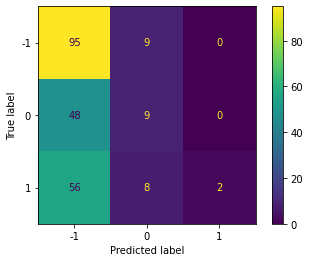

In [65]:
# matriz de confusión del mejor clasificador

(acc,max_ind,matrix,score_test_array) = info_test(resultado['estimator'],score_test_array=True)
score_test_array

In [66]:
acc_HDA(matrix)

(0.9134615384615384, 0.15789473684210525, 0.030303030303030304)

In [67]:
mejor_clasificador = resultado['estimator'][max_ind].best_estimator_
mejor_clasificador

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=250, splitter='random')

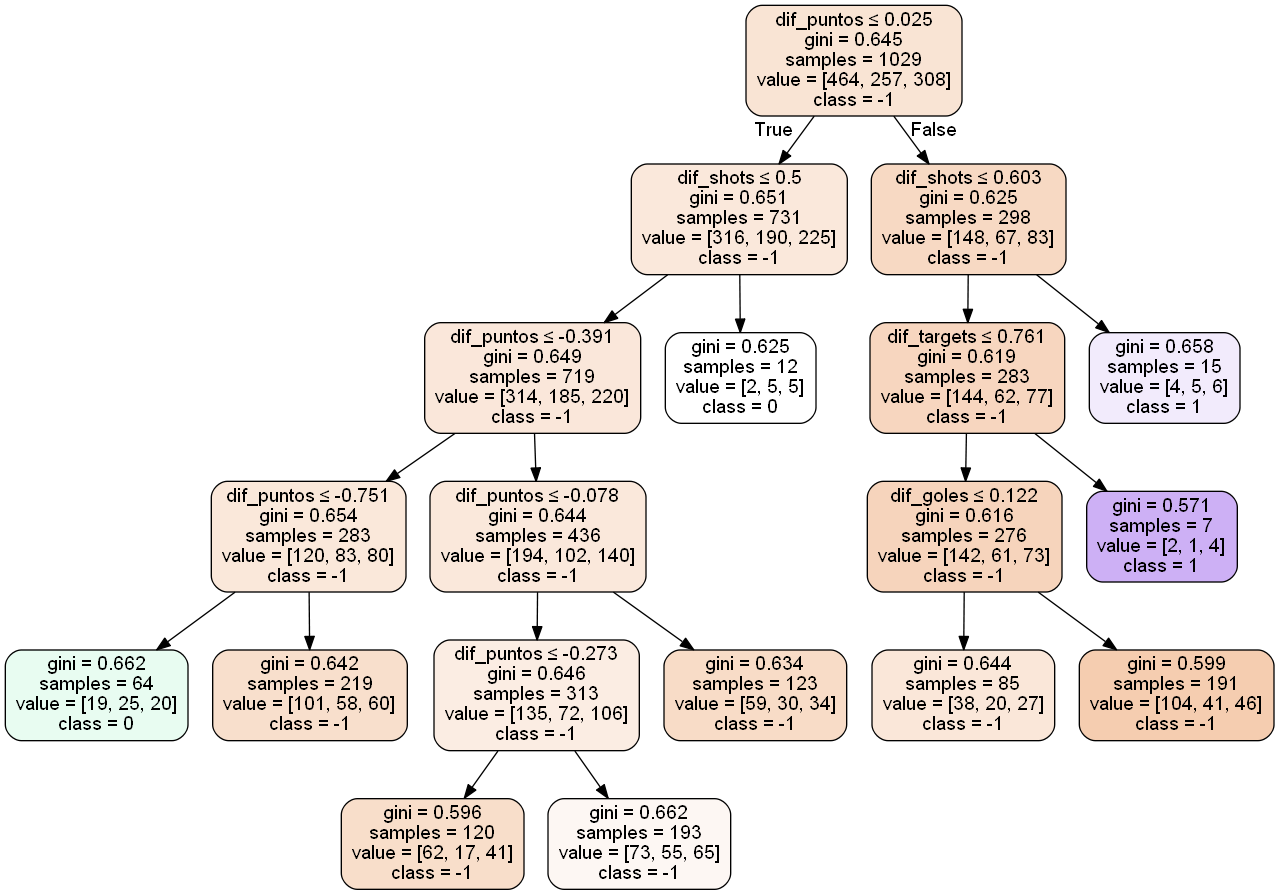

In [68]:
ft.tree_png(mejor_clasificador,['-1','0','1'],train_X.columns)

<b> Vamos a probar con algun modelo usado en el Dataset 1 </b>

In [69]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=250,min_samples_leaf=100,min_samples_split=200,splitter='random')

In [70]:
res2 = ft.train_wCrossVal(clf,train_X,train_Y)
res2

0.018


{'fit_time': array([0.00199461, 0.00224018, 0.00215149, 0.00099754, 0.00199485]),
 'score_time': array([0.00099897, 0.00099993, 0.0012548 , 0.00199485, 0.00099778]),
 'estimator': [DecisionTreeClassifier(max_leaf_nodes=250, min_samples_leaf=100,
                         min_samples_split=200, splitter='random'),
  DecisionTreeClassifier(max_leaf_nodes=250, min_samples_leaf=100,
                         min_samples_split=200, splitter='random'),
  DecisionTreeClassifier(max_leaf_nodes=250, min_samples_leaf=100,
                         min_samples_split=200, splitter='random'),
  DecisionTreeClassifier(max_leaf_nodes=250, min_samples_leaf=100,
                         min_samples_split=200, splitter='random'),
  DecisionTreeClassifier(max_leaf_nodes=250, min_samples_leaf=100,
                         min_samples_split=200, splitter='random')],
 'test_score': array([0.41860465, 0.45136187, 0.45136187, 0.45136187, 0.45136187])}

C:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[43.17180616740088,
 45.81497797356828,
 44.49339207048458,
 45.37444933920705,
 46.69603524229075]

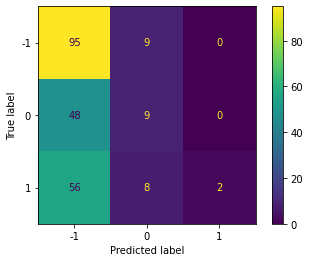

In [72]:
(acc,max_ind,matrix,score_test_array) = info_test(resultado['estimator'],score_test_array=True)
score_test_array

In [73]:
acc_HDA(matrix)

(0.9134615384615384, 0.15789473684210525, 0.030303030303030304)

### BASELINE 2: NAIVE-BAYES

In [74]:
res = ft.train_wCrossVal(naive_bayes.GaussianNB(),train_X,train_Y)

0.020


In [75]:
res['test_score']*100

array([40.31007752, 42.80155642, 45.13618677, 45.91439689, 43.57976654])

C:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


([46.69603524229075,
  48.01762114537445,
  44.93392070484582,
  44.93392070484582,
  48.01762114537445],
 1)

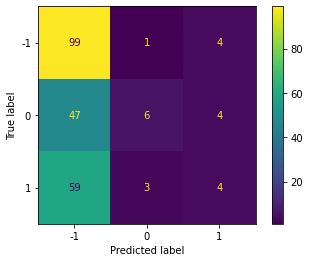

In [76]:
(acc,max_ind,cm,score_test_array) = info_test(res['estimator'],score_test_array=True)
score_test_array,max_ind  # representa array con los test para cada estimador, y el indice del mejor estimador

In [77]:
acc_HDA(cm)

(0.9519230769230769, 0.10526315789473684, 0.06060606060606061)

### BASELINE 3: SVM

In [10]:
clf = svm.SVC()

In [11]:
param_svm = {
    'C' : [10,1000],
    'kernel' : ['linear','poly','rbf'],
    'degree' : [2,4],
    'gamma' : ['scale','auto'],
    'coef0' : [0.0,5.0]
}

In [12]:
# param_svm = {
#     'C' : [1,10],
#     'kernel' : ['rbf'],
#     'gamma' : ['scale','auto'],
# }

In [ ]:
res = ft.train_wGridSearch(clf,train_X,train_Y,param_svm)

In [ ]:
res['test_score']

In [ ]:
(acc,max_ind,cm,score_test_array) = info_test(res['estimator'],score_test_array=True)
acc,max_ind,score_test_array

In [ ]:
acc_HDA(cm)

In [ ]:
res['estimator'][2].best_estimator_.coef0

### BASELINE 4: BAGGING

#### BAGGING CON K-VECINOS

In [97]:
clf = ensemble.BaggingClassifier(neighbors.KNeighborsClassifier(),
                                 n_estimators=3,max_samples=0.75)

In [98]:
params_bag = {
    'base_estimator__n_neighbors' : [5,10,50,100],
    'base_estimator__weights' : ['uniform','distance'],
}

In [99]:
clf.get_params().keys()

dict_keys(['base_estimator__algorithm', 'base_estimator__leaf_size', 'base_estimator__metric', 'base_estimator__metric_params', 'base_estimator__n_jobs', 'base_estimator__n_neighbors', 'base_estimator__p', 'base_estimator__weights', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [100]:
res = ft.train_wGridSearch(clf,train_X,train_Y,param=params_bag,return_train_score=True)

7.769


In [101]:
res['test_score']

array([0.41860465, 0.44747082, 0.40466926, 0.41634241, 0.44747082])

C:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(47.57709251101321,
 4,
 [47.136563876651984,
  46.25550660792951,
  45.37444933920705,
  45.37444933920705,
  47.57709251101321])

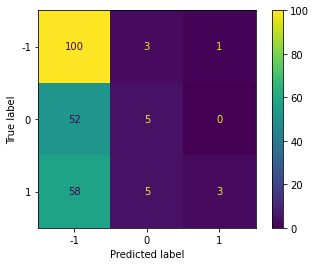

In [102]:
(acc,max_ind,cm,score_test_array) = info_test(res['estimator'],score_test_array=True)
acc,max_ind,score_test_array

In [103]:
acc_HDA(cm)

(0.9615384615384616, 0.08771929824561403, 0.045454545454545456)

In [104]:
res['estimator'][max_ind].best_estimator_.base_estimator.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 100,
 'p': 2,
 'weights': 'uniform'}

In [111]:
mejor_estimador = res['estimator'][max_ind].best_estimator_


#### BAGGING con Árbol de decisión

In [105]:
clf = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(),
                                 n_estimators=3,max_samples=0.75,n_jobs=-1)

In [106]:
clf.base_estimator

DecisionTreeClassifier()

In [107]:
param_tree = {
    'n_estimators' : [3,5,10],
    'base_estimator__splitter' : ['best', 'random'],
    'base_estimator__min_samples_split' : [5,50,250],
    'base_estimator__min_samples_leaf' : [2,5,10],
    'base_estimator__random_state' : [None],
    'base_estimator__max_leaf_nodes' : [None,5,10,50,100]
}

In [108]:
res = ft.train_wGridSearch(clf,train_X,train_Y,param_tree,cv=5,return_train_score=True)

4733.289


In [109]:
res['test_score']

array([0.44186047, 0.45136187, 0.45136187, 0.45136187, 0.45136187])

C:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(45.81497797356828,
 1,
 [44.49339207048458,
  45.81497797356828,
  45.81497797356828,
  45.37444933920705,
  45.81497797356828])

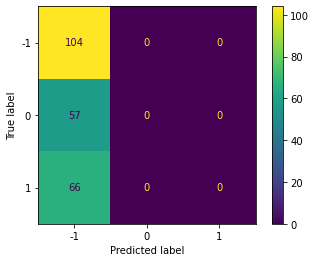

In [110]:
(acc,max_ind,cm,score_test_array) = info_test(res['estimator'],score_test_array=True)
acc,max_ind,score_test_array

### BASELINE 5: RANDOM FOREST

In [112]:
clf = ensemble.RandomForestClassifier(n_jobs=-1)

In [113]:
params_randfor = {
    'n_estimators' : [200,1000],
    'max_depth' : [5,10],
    'min_samples_split' : [5,50,250],
    'min_samples_leaf' : [2,5,50],
    'max_leaf_nodes' : [None,3,10]
}

In [114]:
res = ft.train_wGridSearch(clf,train_X,train_Y,params_randfor)

1284.749


In [115]:
res['test_score']

array([0.4496124 , 0.45525292, 0.44747082, 0.44747082, 0.45136187])

C:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(45.81497797356828,
 0,
 [45.81497797356828,
  45.37444933920705,
  45.37444933920705,
  45.37444933920705,
  45.81497797356828])

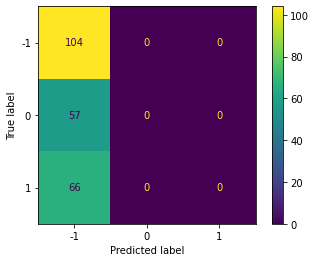

In [116]:
(acc,max_ind,cm,score_test_array) = info_test(res['estimator'],score_test_array=True)
acc,max_ind,score_test_array

In [117]:
acc_HDA(cm)

(1.0, 0.0, 0.0)

In [118]:
res['estimator'][max_ind].best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=250,
                       n_estimators=200, n_jobs=-1)

### BASELINE 6: ADA BOOST

In [119]:
clf = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier())

In [125]:
clf.get_params().keys()

dict_keys(['algorithm', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [126]:
params_ada = {
    'n_estimators' : [10,50,200],
    'learning_rate' : [0.2,1.0,5.0],
    'base_estimator__max_depth' : [1,5,10],
    'base_estimator__min_samples_split' : [5,50,250],
    'base_estimator__min_samples_leaf' : [2,5,50],
    'base_estimator__max_leaf_nodes' : [None,3,10]
}

In [127]:
res = ft.train_wGridSearch(clf,train_X,train_Y,params_ada,cv=3)

1446.631


In [128]:
res['test_score']

array([0.4379845 , 0.45914397, 0.45525292, 0.44747082, 0.307393  ])

C:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(46.25550660792951,
 0,
 [46.25550660792951,
  45.37444933920705,
  45.37444933920705,
  44.052863436123346,
  26.87224669603524])

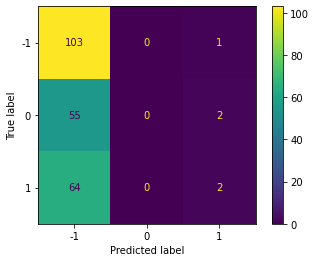

In [129]:
(acc,max_ind,cm,score_test_array) = info_test(res['estimator'],score_test_array=True)
acc,max_ind,score_test_array

In [130]:
acc_HDA(cm)

(0.9903846153846154, 0.0, 0.030303030303030304)

In [131]:
mejor_clasificador = res['estimator'][max_ind].best_estimator_
mejor_clasificador

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         max_leaf_nodes=3,
                                                         min_samples_leaf=50,
                                                         min_samples_split=5),
                   learning_rate=0.2, n_estimators=10)

In [132]:
mejor_clasificador.base_estimator.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### BASELINE 7: GRADIANT BOOSTING DECISION TREE

In [133]:
clf = ensemble.GradientBoostingClassifier()

In [134]:
params_gb = {
#     'loss' : ['deviance','exponential'],
    'learning_rate' : [0.02,0.1,0.5,2],
    'n_estimators' : [100,500],
    'min_samples_split' : [0.05,0.1],
    'min_samples_leaf' : [10,50],
    'max_depth' : [1,3],
    'max_leaf_nodes' : [3,10],
    'tol':[0.001]
}

In [135]:
res = ft.train_wGridSearch(clf,train_X,train_Y,params_gb)

KeyboardInterrupt: 

In [ ]:
res['test_score']

In [ ]:
(acc,max_ind,cm,score_test_array) = info_test(res['estimator'],score_test_array=True)
acc,max_ind,score_test_array

In [ ]:
acc_HDA(cm)

In [ ]:
mejor_clasificador = res['estimator'][4].best_estimator_
mejor_clasificador

In [ ]:
mejor_clasificador.get_params()